<a href="https://www.kaggle.com/code/athiraravichandran/spotify-cleaning-visualization-1?scriptVersionId=272802564" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [2]:
df= pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='ISO-8859-1')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
# streams has object as data type, change it to int
df['streams'] = pd.to_numeric(df['streams'], errors= 'coerce') #'coerce' converts invalid data to NaN

In [5]:
df.shape

(953, 24)

In [6]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Only two columns has null values. Since these null values doesn't have that much impact on the overall analysis, let's replace them with NA.

In [7]:
#replacing null values with 'NA' using fillna()
df['in_shazam_charts'] = df['in_shazam_charts'].fillna("NA")
df['key']= df['key'].fillna('NA')

Now that we have removed all the null values, let's try to visualize the data using matplotlib.

# Top 10 artists by number of songs

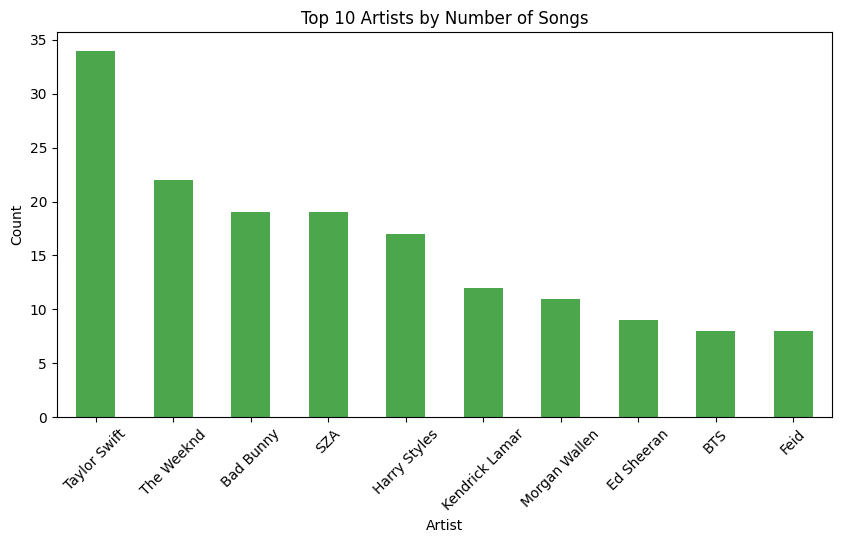

In [8]:
import matplotlib.pyplot as plt
# using bar chart
top_artists= df['artist(s)_name'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_artists.plot(kind='bar', color='green', alpha=0.7)
plt.title("Top 10 Artists by Number of Songs")
plt.xlabel("Artist")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Distribution of numerical features

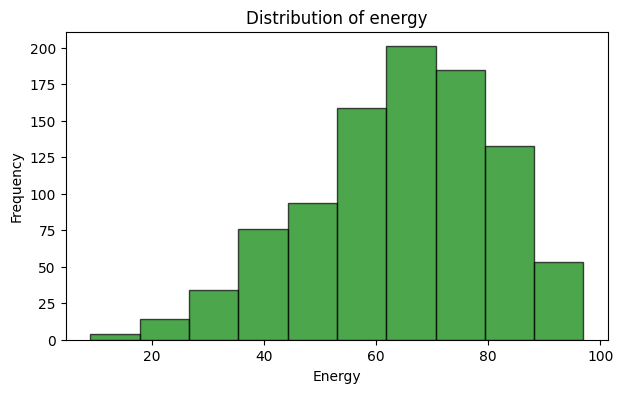

In [9]:
# using hist()
plt.figure(figsize=(7,4))
plt.hist(df['energy_%'], color='green', edgecolor='black', alpha=0.7)
plt.title("Distribution of energy")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()

# Top 10 popular songs

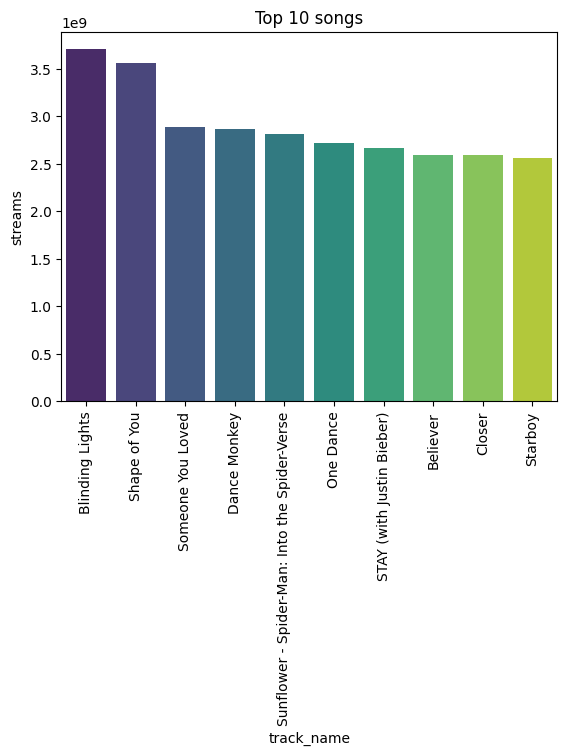

In [10]:
#using scatter
import seaborn as sns
top_songs= df.nlargest(10, 'streams')
plt.title("Top 10 songs")
sns.barplot( x='track_name', y= 'streams', data= top_songs, palette='viridis')
plt.xticks(rotation=90)
plt.show()

# Dancebility vs Energy

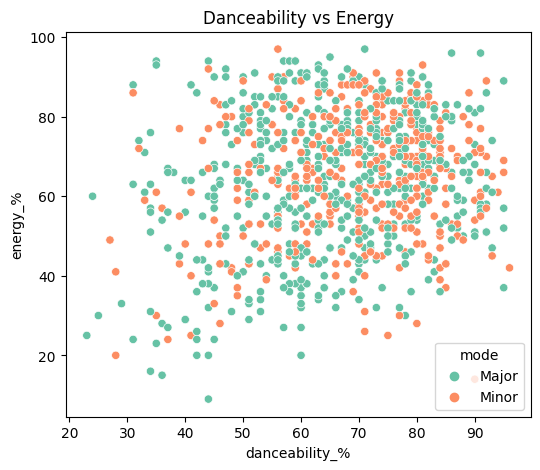

In [11]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='danceability_%', y='energy_%', hue='mode', palette='Set2')
plt.title('Danceability vs Energy')
plt.show()


In [12]:
print(df.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


# Correlation Heatmap of Spotify Song Features

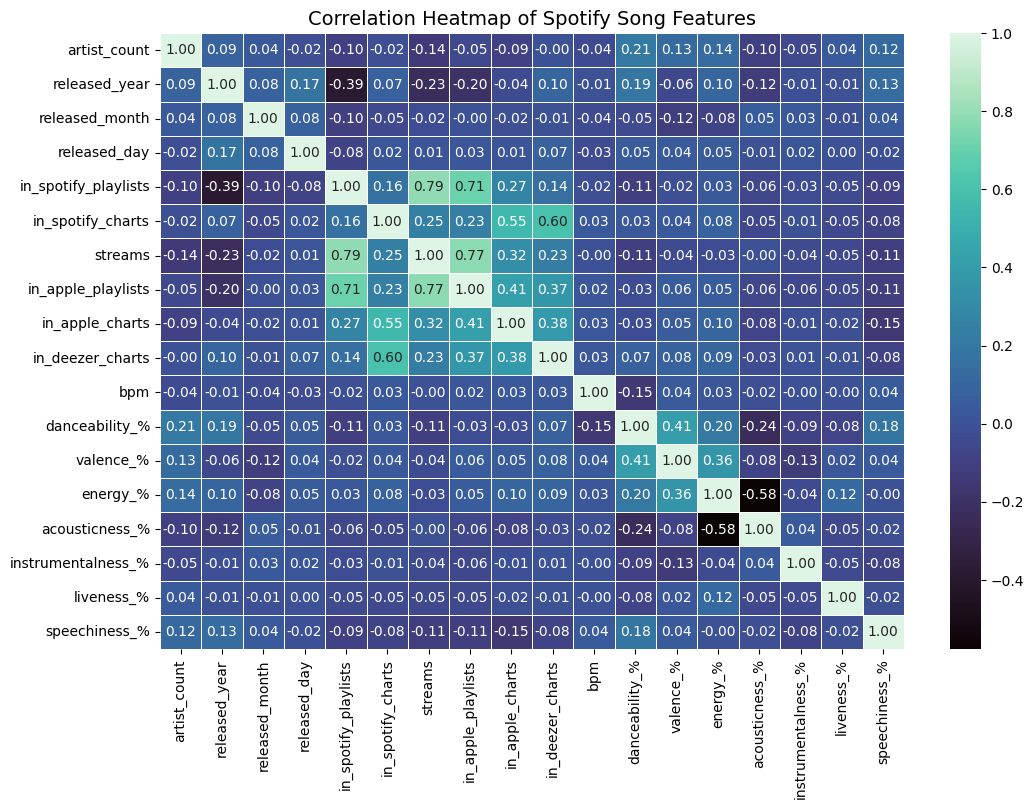

In [13]:
numeric_df = df.select_dtypes(include=['number']) #keeps only numerical columns, correlation works only on numbers
corr = numeric_df.corr() # calculates how strongly each numbers are related
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot= True, cmap='mako', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Spotify Song Features', fontsize=14)
plt.show()

"annot=True", shows correlation value in each cell. 